# 🔍 Incident Classification with Random Forest
This notebook trains a Random Forest model on the reshaped multi-sensor dataset to classify incidents like Power Outage, Overheating, and Vibration Increase.

## 📥 Step 1: Load the Dataset

In [8]:
import pandas as pd

# Load the reshaped and labeled dataset
file_path = "../src/devices_data/bale_counter_0_unified.csv"  # Adjust path if needed
df = pd.read_csv(file_path)
df.head()

,timestamp,is_anomaly,state,label,average_weight,bales,total_weight
0,2025-04-07 00:00:00,False,off,Normal,0.0,0.0,0.0
1,2025-04-07 00:01:00,False,off,Normal,0.0,0.0,0.0
2,2025-04-07 00:02:00,False,off,Normal,0.0,0.0,0.0
3,2025-04-07 00:03:00,False,off,Normal,0.0,0.0,0.0
4,2025-04-07 00:04:00,False,off,Normal,0.0,0.0,0.0


## 🧹 Step 2: Preprocessing the Data

In [9]:
# Drop timestamp and is_anomaly
df = df.drop(columns=["timestamp", "is_anomaly"])

# One-hot encode the 'state' column
df = pd.get_dummies(df, columns=["state"])
df.head()

,label,average_weight,bales,total_weight,state_idle,state_off,state_run
0,Normal,0.0,0.0,0.0,0,1,0
1,Normal,0.0,0.0,0.0,0,1,0
2,Normal,0.0,0.0,0.0,0,1,0
3,Normal,0.0,0.0,0.0,0,1,0
4,Normal,0.0,0.0,0.0,0,1,0


## 📊 Step 3: Prepare Features and Labels

In [10]:
X = df.drop("label", axis=1)
y = df["label"]

## 🔀 Step 4: Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 🧠 Step 5: Train the Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 📈 Step 6: Evaluate the Model

Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      4030

    accuracy                           1.00      4030
   macro avg       1.00      1.00      1.00      4030
weighted avg       1.00      1.00      1.00      4030



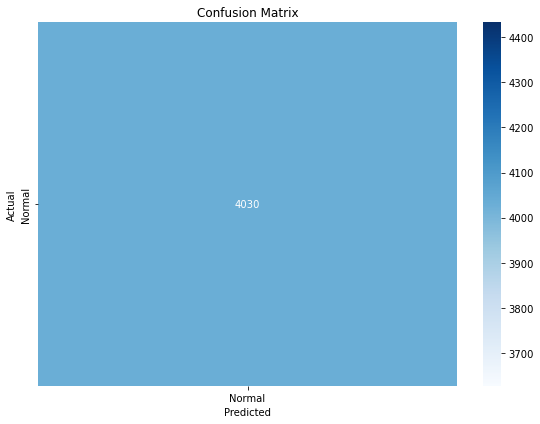

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [14]:
# 💾 Save the trained model
import joblib
joblib.dump(clf, "../test_cases/saved_models/random_forest_bale.pkl")
print("✅ Model saved to: ../test_cases/saved_models/random_forest_bale.pkl")

✅ Model saved to: ../test_cases/saved_models/random_forest_bale.pkl


In [15]:
print(X_train.head())

       average_weight     bales  total_weight  state_idle  state_off  \
15025      272.272592  9.241662   2471.795302           0          0   
9513       273.689331  9.401186   2533.835183           0          0   
9482       272.781786  9.463164   2532.982218           0          0   
994        272.840330  9.400102   2542.862172           0          0   
15991      271.583085  9.046834   2451.322151           0          0   

       state_run  
15025          1  
9513           1  
9482           1  
994            1  
15991          1  
